In [41]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

In [25]:

df = pd.read_csv('data/Vehicle Maintenance- Service Records.csv')

In [26]:
df.head()

,slno,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
0,1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,...,0,0,0,0,0,0,0,0,0,2566
1,2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,...,0,0,0,0,0,0,0,0,0,2633
2,3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,...,0,0,0,0,0,0,0,0,0,2643
3,4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,...,0,0,0,0,0,0,0,0,0,2532
4,5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,...,0,0,0,0,0,0,0,0,0,2489


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   slno                           1139 non-null   int64 
 1   vehicle_type                   1139 non-null   object
 2   brand                          1139 non-null   object
 3   model                          1139 non-null   object
 4   engine_type                    1139 non-null   object
 5   make_year                      1139 non-null   int64 
 6   region                         1139 non-null   object
 7   mileage_range                  1139 non-null   int64 
 8   mileage                        1139 non-null   int64 
 9   oil_filter                     1139 non-null   int64 
 10  engine_oil                     1139 non-null   int64 
 11  washer_plug_drain              1139 non-null   int64 
 12  dust_and_pollen_filter         1139 non-null   int64 
 13  whe

In [28]:
df['make_year'] = df['make_year'].astype('object')

In [29]:
df.drop(['slno','oil_filter','engine_oil','vehicle_type'], axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   brand                          1139 non-null   object
 1   model                          1139 non-null   object
 2   engine_type                    1139 non-null   object
 3   make_year                      1139 non-null   object
 4   region                         1139 non-null   object
 5   mileage_range                  1139 non-null   int64 
 6   mileage                        1139 non-null   int64 
 7   washer_plug_drain              1139 non-null   int64 
 8   dust_and_pollen_filter         1139 non-null   int64 
 9   whell_alignment_and_balancing  1139 non-null   int64 
 10  air_clean_filter               1139 non-null   int64 
 11  fuel_filter                    1139 non-null   int64 
 12  spark_plug                     1139 non-null   int64 
 13  bra

In [31]:
X = df.drop(columns=['cost'],axis=1)

In [32]:
X.head()

,brand,model,engine_type,make_year,region,mileage_range,mileage,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant
0,honda,jazz,petrol,2017,chennai,10000,11400,0,0,1,0,0,0,0,0,0,0,0,0
1,honda,jazz,petrol,2017,chennai,10000,11453,0,0,1,0,0,0,0,0,0,0,0,0
2,honda,jazz,petrol,2017,chennai,10000,10706,0,0,0,0,0,0,0,0,0,0,0,0
3,honda,jazz,petrol,2017,chennai,10000,11015,0,0,0,0,0,0,0,0,0,0,0,0
4,honda,jazz,petrol,2017,chennai,10000,10039,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
y = df['cost']

In [34]:
y

0       2566
1       2633
2       2643
3       2532
4       2489
        ... 
1134    7289
1135    7280
1136    7310
1137    7349
1138    7399
Name: cost, Length: 1139, dtype: int64

In [36]:
# Create Column Transformer with 3 types of transformers
num_features = df[['mileage_range','mileage']].columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:

X = preprocessor.fit_transform(X)

In [38]:

X.shape

(1139, 15)

In [42]:

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((911, 15), (228, 15))

In [43]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 2107291.0977
- Root Mean Squared Error: 1451.6512
- Mean Absolute Error: 1091.8793
- R2 Score: 0.5567
----------------------------------
Model performance for Test set
- Mean Squared Error: 2099642.4167
- Root Mean Squared Error: 1449.0143
- Mean Absolute Error: 1073.1096
- R2 Score: 0.5759


Lasso
Model performance for Training set
- Mean Squared Error: 2107060.8363
- Root Mean Squared Error: 1451.5719
- Mean Absolute Error: 1089.5263
- R2 Score: 0.5568
----------------------------------
Model performance for Test set
- Mean Squared Error: 2099614.0047
- Root Mean Squared Error: 1449.0045
- Mean Absolute Error: 1070.1666
- R2 Score: 0.5759


Ridge
Model performance for Training set
- Mean Squared Error: 2108231.5842
- Root Mean Squared Error: 1451.9751
- Mean Absolute Error: 1090.4528
- R2 Score: 0.5565
----------------------------------
Model performance for Test set
- Mean Squared Error: 2100942.4105
- Root M

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.893076
3,K-Neighbors Regressor,0.886157
6,XGBRegressor,0.879617
5,Random Forest Regressor,0.864421
4,Decision Tree,0.799320
8,AdaBoost Regressor,0.652561
1,Lasso,0.575944
0,Linear Regression,0.575938
2,Ridge,0.575676


In [46]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 57.59


In [48]:

cbr_model = CatBoostRegressor()
cbr_model = cbr_model.fit(X_train, y_train)
y_pred = cbr_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.040344
0:	learn: 2125.8010954	total: 3.19ms	remaining: 3.19s
1:	learn: 2069.8621310	total: 6.33ms	remaining: 3.16s
2:	learn: 2015.4714673	total: 9.56ms	remaining: 3.18s
3:	learn: 1958.9564848	total: 12.3ms	remaining: 3.06s
4:	learn: 1913.5046907	total: 14.8ms	remaining: 2.94s
5:	learn: 1866.9735746	total: 17.4ms	remaining: 2.88s
6:	learn: 1832.6164910	total: 19.1ms	remaining: 2.7s
7:	learn: 1789.9839079	total: 21.5ms	remaining: 2.66s
8:	learn: 1752.8449441	total: 23.9ms	remaining: 2.63s
9:	learn: 1716.8419111	total: 26.5ms	remaining: 2.63s
10:	learn: 1672.1903628	total: 29.2ms	remaining: 2.63s
11:	learn: 1636.5437156	total: 32ms	remaining: 2.63s
12:	learn: 1604.0429709	total: 34.4ms	remaining: 2.62s
13:	learn: 1573.6562560	total: 37.1ms	remaining: 2.61s
14:	learn: 1535.7480879	total: 39.5ms	remaining: 2.6s
15:	learn: 1502.6813683	total: 42.2ms	remaining: 2.6s
16:	learn: 1479.7384395	total: 44.1ms	remaining: 2.55s
17:	learn: 1454.5608219	total: 46ms	remaining: 2.5

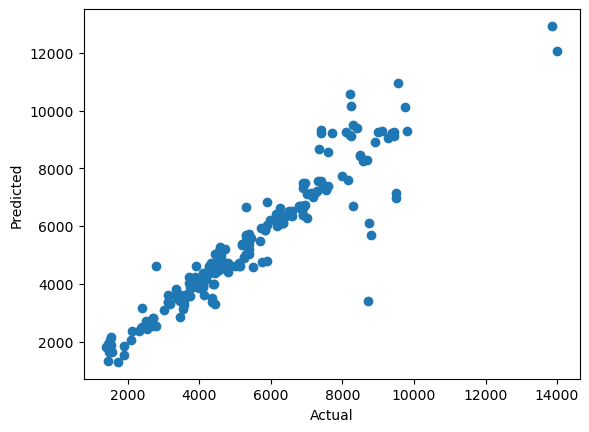

In [49]:

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

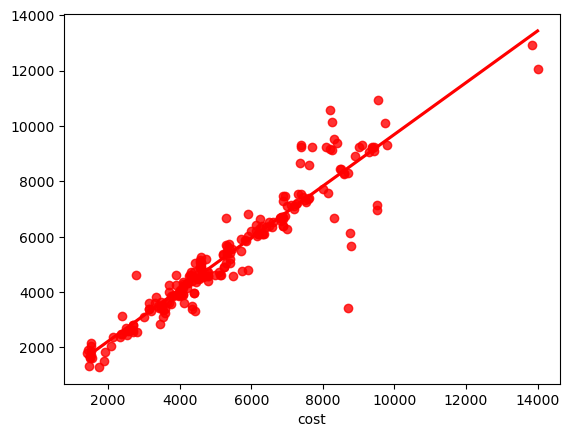

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [51]:

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
788,4622,4661.111795,-39.111795
904,7599,7391.509087,207.490913
289,8400,9385.861907,-985.861907
1040,4349,4402.480235,-53.480235
332,1550,1628.552911,-78.552911
...,...,...,...
66,4274,4628.846183,-354.846183
536,4732,5200.044309,-468.044309
67,4272,4571.351786,-299.351786
359,4030,3899.671593,130.328407
